In [1]:
#Install packages
!rm -rf /content/sample_data


# Install netcdf library
!apt-get install -y netcdf-bin


!pip install "cdsapi>=0.7.4" 
!pip install xarray matplotlib pooch pandas numpy cartopy


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


# Exercise: Visualization of Temperature Anomaly Map for a Given Date

In this exercise, you will use a previously downloaded ERA5 NetCDF dataset to:

- Compute the temperature anomaly over the whole spatial domain for a specific date.
- Plot the spatial anomaly on a map using **xarray** and **Cartopy**.

---

### Steps:

1. Load the NetCDF dataset with **xarray**.
2. Compute the daily climatology (mean temperature for each day of the year).
3. Calculate the anomaly by subtracting the climatology from the actual temperature data.
4. Select the spatial anomaly field for a chosen date.
5. Plot the spatial anomaly on a map using **Cartopy**, including coastlines and borders.

---

### Partial Code Template

```python
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Load dataset (replace with your downloaded filename)
ds = xr.open_dataset("your_downloaded_file.nc")

variable = "2m_temperature"

# Compute daily climatology (mean for each day of the year)
climatology = ds[variable].groupby("time.dayofyear").mean("time")

# Calculate anomaly
anomaly = ds[variable].groupby("time.dayofyear") - climatology

# Select the date to visualize
date_of_interest = pd.Timestamp("YYYY-MM-DD")  # Replace with your date
anomaly_on_date = anomaly.sel(time=date_of_interest)

# Plot the spatial anomaly
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

anomaly_on_date.plot(
    ax=ax,
    cmap="coolwarm",
    cbar_kwargs={'label': 'Temperature Anomaly (°C)'},
    transform=ccrs.PlateCarree()
)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"Temperature Anomaly on {date_of_interest.date()}")
plt.show()


# Code Explanation: SST Anomaly Visualization with Map and Time Series

---

### Imports and Data Loading

- Import necessary libraries: `xarray` for handling NetCDF data, `cartopy` for map projections and plotting, `matplotlib` for general plotting utilities.
- Load the NetCDF dataset (`SST_MED_SST_L4_NRT_OBSERVATIONS_010_004_a_V2_1754316882929.nc`) using `xarray`.
- Select the variable of interest, `"analysed_sst"` (sea surface temperature).
  
---

### Calculate Climatology and Anomalies

- Compute the monthly climatology: average SST for each month across all years (`da.groupby("time.month").mean("time")`).
- Calculate anomalies as the difference between actual SST and the monthly climatology (`da.groupby("time.month") - climatology`).

---

### Define Locations for Annotations and Time Series Extraction

- Create a dictionary `locations` with three points around Sicily, each with latitude, longitude, annotation position offsets (`pos_x`, `pos_y`), and a unique code (`c`).
- These locations will be plotted as markers on the map and used to extract time series of SST anomalies.

---

### Plot Setup

- Create a figure with two panels side-by-side using `matplotlib`'s `GridSpec`:
  - Left panel (90% width) for the map.
  - Right panel (1.4x width) for three stacked time series plots (one per location).

- Configure colorbar parameters for horizontal orientation, size, and label.

---

### Left Panel: SST Anomaly Map

- Select the anomaly data for the specified date (`time_str = "2019-06-22"`).
- Calculate min and max anomaly values for that date and compute the symmetric range (`max_abs`) to center the color scale around zero.
- Plot the anomaly map on the left panel using a diverging colormap (`seismic`) with the set symmetric color scale.
- Add coastlines (white color) and land feature (black fill) for visual context.
- Add gridlines with labels only on bottom and left (disable top and right labels).

---

### Right Panel: Time Series for Each Location

- Create three subplots stacked vertically for the time series of the three locations.

- For each location:
  - Extract nearest anomaly time series for the given latitude and longitude.
  - Plot the anomaly time series on its respective subplot.
  - Hide the x-axis label for the first two plots for visual clarity.
  - Add a vertical dashed red line on the date selected on the map (`time_str`) to highlight that day.
  - Enable grid and legend for readability.
  - Set the subplot title to indicate which location's data is being plotted.

---

### Plotting Markers and Annotations on the Map

- On the map panel, plot white star markers at each location's coordinates.
- Annotate each marker with the location's unique code (`c`), positioned offset by the provided `pos_x` and `pos_y` values.
- The annotation text has a yellow background with a black border to enhance readability.

---

### Final Display

- Call `plt.show()` to render the figure with both the map and the time series subplots.

---

### Additional Notes:

- The use of `transform=ccrs.PlateCarree()` for plotting and annotation ensures coordinates are interpreted as longitude/latitude in degrees.
- The symmetric color scale (`-max_abs` to `+max_abs`) centers zero anomalies visually, making positive and negative deviations equally visible.
- The vertical red line in time series plots visually links the time slice shown on the map to the temporal evolution at the specific points.
- Gridlines and coastlines add geographical context to the map for easier interpretation.

---

This code provides an integrated visualization of spatial SST anomalies at a specific date alongside the temporal anomaly patterns at key locations, combining geospatial and temporal perspectives.


Processing North_Sicily
Processing South_Sicily
Processing Strait_of_Messina


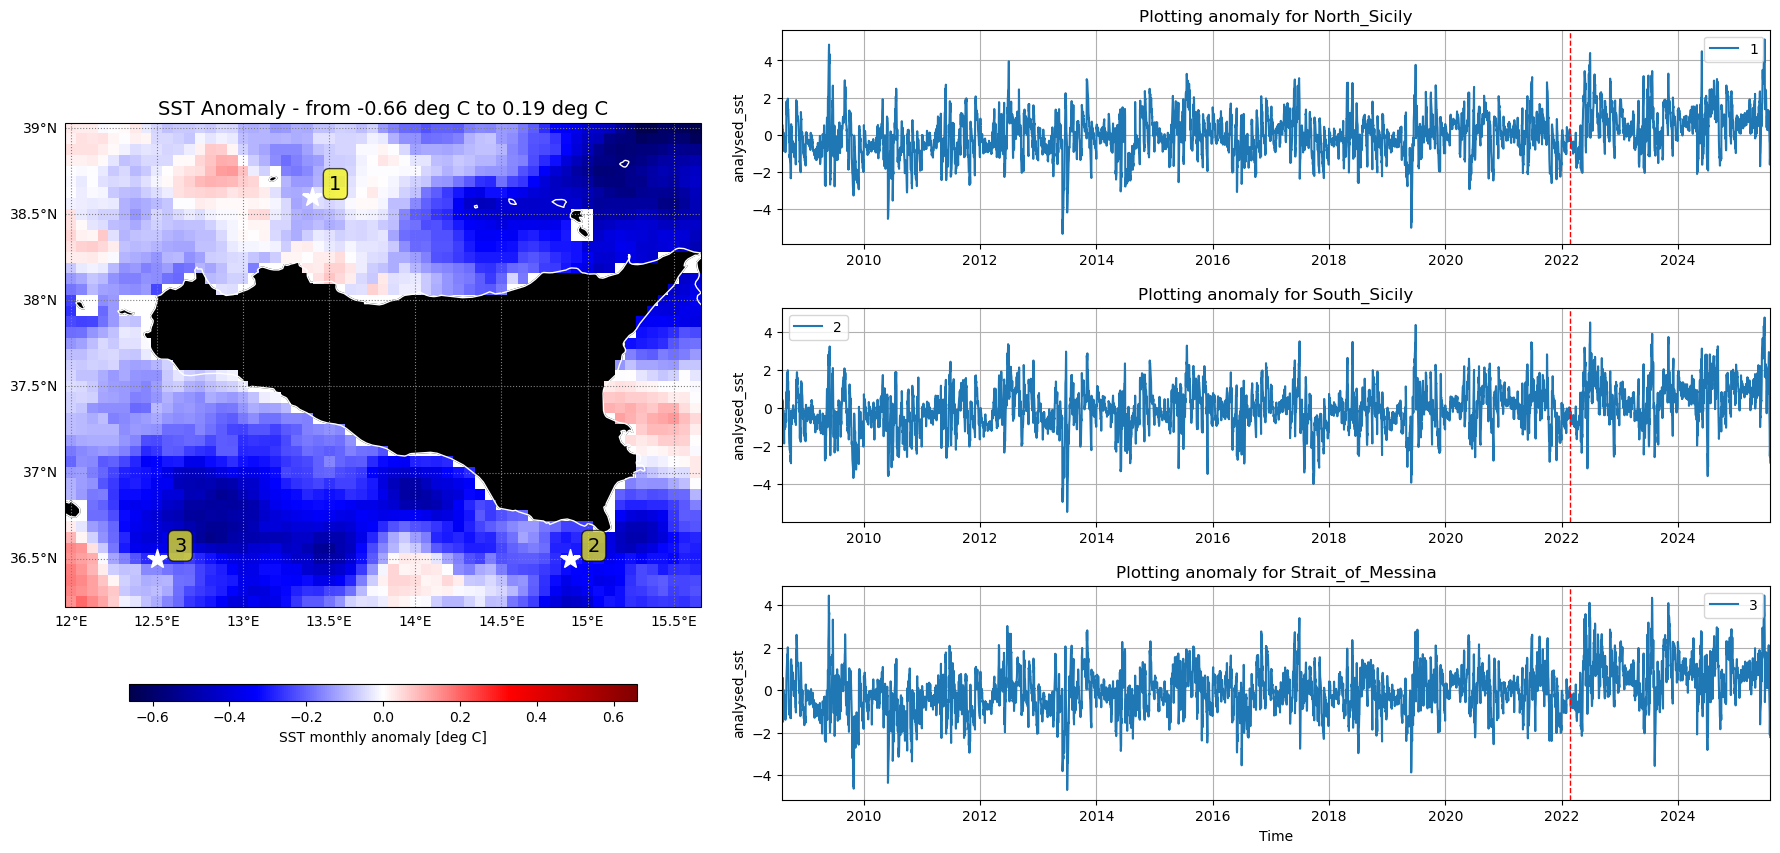

In [16]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

# Load dataset (replace with your downloaded filename)
ds = xr.open_dataset("SST_MED_SST_L4_NRT_OBSERVATIONS_010_004_a_V2_1754316882929.nc")

variable = "analysed_sst"

da = ds[variable]

#print(da)


climatology = da.groupby("time.month").mean("time")
anomalies = da.groupby("time.month") - climatology

plt.close('all')

locations = {
    "North_Sicily": {
        "lat": 38.6,
        "lon": 13.4,
        "pos_x": 0.1,
        "pos_y": 0.02,
        "c":1
    },
    "South_Sicily": {
        "lat": 36.5,
        "lon": 14.9,
        "pos_x": 0.1,
        "pos_y": 0.02,
        "c":2
    },
    "Strait_of_Messina": {
        "lat": 36.5,
        "lon": 12.5,
        "pos_x": .1,
        "pos_y": .02,
        "c":3
    }
}



time_str="2009-05-25"
time_str="2019-06-22"
time_str="2022-02-25"
#time_str="2022-05-25"

# --- PLOT SETUP ---
fig = plt.figure(figsize=(22, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[.9, 1.4], wspace=0.1)
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.8, 
               'aspect':30,'pad':.1, 'label':'SST monthly anomaly [deg C]'}

# -- LEFT PANEL: Map with Cartopy --
ax_map = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax_map.set_title("SST Anomaly", fontsize=14)



vmin = anomalies.sel(time=time_str).min()
vmax = anomalies.sel(time=time_str).max()
max_abs = max(abs(vmin), abs(vmax))
anomalies.sel(time=time_str).plot(cmap='seismic', robust=True, ax=ax_map,cbar_kwargs=cbar_kwargs,     vmin=-max_abs,
    vmax=+max_abs)

#CARTOPY Stuff: 
ax_map.coastlines(resolution='10m', color='white')
ax_map.add_feature(cfeature.LAND, color='black')

gl = ax_map.gridlines(draw_labels=True, linestyle=':', color='gray')
gl.top_labels = False
gl.right_labels = False

# -- RIGHT PANEL: Time series (3 stacked) --
gs_right = gs[0, 1].subgridspec(3, 1, hspace=0.3)


ax1 = fig.add_subplot(gs_right[0])
ax2 = fig.add_subplot(gs_right[1], sharex=ax1)
ax3 = fig.add_subplot(gs_right[2], sharex=ax1)

axes = [ax1, ax2, ax3]

for i, (name, info) in enumerate(locations.items()):

    lat = info["lat"]
    lon = info["lon"]
    dx = info["pos_x"]
    dy = info["pos_y"]
    c = info["c"]

    ax = axes[i]  # pick the corresponding axis
    
    anomaly_t_series = anomalies.sel(latitude=lat, longitude=lon, method='nearest')
    anomaly_t_series.plot(ax=ax, label =f'{c}')
    
    if c<3:
        ax.xaxis.label.set_visible(False)
    
    ax.set_title(f"Plotting anomaly for {name}")
    ax.set_xlim(anomaly_t_series.time.min(), anomaly_t_series.time.max())
    ax.grid()
    ax.legend()

    x = anomalies.sel(time=time_str).time.values
    ax.axvline(x=x, color='red', linestyle='--', linewidth=1)
    #print(x)
    
    print(f"Processing {name}")

    # Plot the marker
    ax_map.plot(lon, lat, marker='*', color='white', markersize=15, transform=ccrs.PlateCarree())
    ax_map.annotate(
        f"{c}",
        xy=(lon, lat),
        xytext=(lon + dx, lat + dy),  
        textcoords='data',
         fontsize=14,  # bigger font size
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", alpha=0.7),  # background box,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ccrs.PlateCarree()
    )
ax_map.set_title(f"SST Anomaly - from {vmin.values:.2f} deg C to {vmax.values:.2f} deg C", fontsize=14)    
plt.show()
